In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl

In [4]:
dfv= pd.read_csv("México_IQR.csv")
dfv.head(5)

,Unnamed: 0,identificación,fuente,nombre,descripciÃ³n,descripciÃ³n general del vecindario,id_host,nombre_host,tiempo_respuesta_host,tasa_respuesta_host,...,noches_mÃ­nimo_avg_ntm,mÃ¡ximas_noches_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicaciÃ³n,review_scores_location,review_scores_value,reseñas_por_mes
0,0,35797.0,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",153786,Dici,a few days or more,0%,...,1.0,7.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
1,1,44616.0,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Not available,196253,Fernando,within an hour,100%,...,1.0,365.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
2,2,67703.0,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Not available,334451,Nicholas,within an hour,71%,...,2.0,30.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
3,3,70644.0,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,212109,Trisha,within a few hours,100%,...,3.7,180.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
4,4,107078.0,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",540705,Andrea,within an hour,100%,...,1.0,1125.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11


__PRECIO VS TASA ACEPTACIÓN HOST__

In [7]:
dfv['tasa_de_aceptación_host'] = dfv['tasa_de_aceptación_host'].str.replace('%', '', regex=True).astype(float) / 100

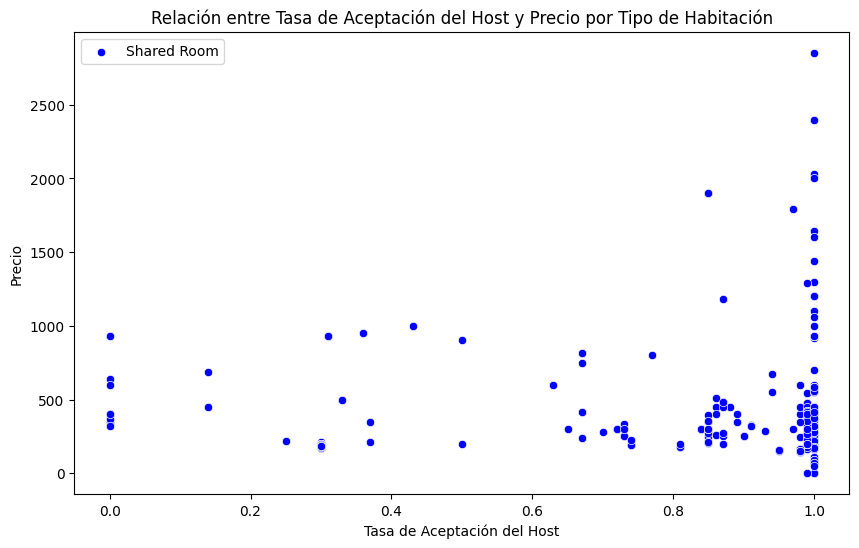

In [8]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['tasa_de_aceptación_host', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tasa_de_aceptación_host', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre Tasa de Aceptación del Host y Precio por Tipo de Habitación")
plt.xlabel("Tasa de Aceptación del Host")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [9]:
# Llenar los valores nulos con el promedio de la columna
df_shared_room['tasa_de_aceptación_host'] = df_shared_room['tasa_de_aceptación_host'].fillna(dfv['tasa_de_aceptación_host'].mean())

In [10]:
vars_Indep= df_shared_room[['tasa_de_aceptación_host']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [11]:
model.fit(X=vars_Indep, y=Vars_Dep)

LinearRegression()

In [12]:
model.__dict__

y_pred= model.predict(X=df_shared_room[['tasa_de_aceptación_host']])
y_pred

array([383.27843781, 265.41935269, 365.59957504, 301.95566908,
       376.2068927 , 383.27843781, 379.74266525, 383.27843781,
       301.95566908, 294.88412397, 383.27843781, 383.27843781,
       351.45648483, 351.45648483, 383.27843781, 383.27843781,
       383.27843781, 383.27843781, 383.27843781, 383.27843781,
       339.67057631, 383.27843781, 344.38493972, 383.27843781,
       383.27843781, 383.27843781, 383.27843781, 344.38493972,
       383.27843781, 382.09984695, 382.09984695, 382.09984695,
       382.09984695, 382.09984695, 383.27843781, 369.13534759,
       382.09984695, 383.27843781, 376.2068927 , 382.09984695,
       382.09984695, 382.09984695, 382.09984695, 382.09984695,
       383.27843781, 265.41935269, 383.27843781, 383.27843781,
       383.27843781, 383.27843781, 383.27843781, 383.27843781,
       383.27843781, 383.27843781, 383.27843781, 379.74266525,
       383.27843781, 383.27843781, 382.09984695, 382.09984695,
       382.09984695, 383.27843781, 383.27843781, 365.59

In [13]:
df_shared_room.insert(0, 'Predicciones', y_pred)
df_shared_room

,Predicciones,Unnamed: 0,identificación,fuente,nombre,descripciÃ³n,descripciÃ³n general del vecindario,id_host,nombre_host,tiempo_respuesta_host,...,noches_mÃ­nimo_avg_ntm,mÃ¡ximas_noches_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicaciÃ³n,review_scores_location,review_scores_value,reseñas_por_mes
115,383.278438,115,6.171370e+05,previous scrape,Apt near Mexico City's downtown,Not available.,Not available,3059169,Andoni,Unknown,...,1.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
258,265.419353,258,3.197924e+06,city scrape,cuarto con terraza y uso general,"double bed , full bathroom, room with own terr...",Condesa is the main attraction in the city for...,16186468,Jordi,a few days or more,...,2.00,365.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
366,365.599575,366,5.434219e+06,city scrape,ãƒ¡ã‚­ã‚·ã‚³ã‚·ãƒ†ã‚£ã®é©å‘½è¨˜å¿µå¡”ä»˜è¿‘ã...,Single Room $30<br />Double room $60<br />Dorm...,Not available,28190065,Tetsuo,within a few hours,...,2.00,1125.0,4.44,4.74,4.47,4.74,4.71,4.71,4.59,0.30
444,301.955669,444,6.972071e+06,city scrape,SUPER SAVER GROUP DEAL - PERFECT FOR STUDENTS,Welcome to the best college-style dorms in a B...,Not available,35406862,Thor,within a few hours,...,1.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
456,376.206893,456,6.076798e+06,city scrape,Nova House,It has all the comforts to rest if you come fo...,The neighborhood is popular where you can expe...,31426842,Antonio,within a few hours,...,1.00,1125.0,4.85,4.84,4.93,4.94,4.91,4.69,4.93,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26261,383.278438,26261,1.240000e+18,city scrape,Cuarto Familiar para 6 personas,This bedroom is ideal for a full family or a g...,Not available,63557308,Oscar Arturo,within an hour,...,1.00,365.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
26336,383.278438,26336,1.250000e+18,city scrape,IOW4 LV studio,IOW4 LV STUDIOÂ© CONCEPT TO SHARE TRIPS IN STA...,Not available,244230249,Joe'S,within an hour,...,3.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
26371,383.278438,26371,1.250000e+18,city scrape,IOW4 LV maravillosa,IOW4 LV WONDERFULÂ© CONCEPT TO SHARE TRIPS IN ...,Not available,244230249,Joe'S,within an hour,...,3.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
26447,383.278438,26447,1.250000e+18,city scrape,La casa de marmol,Disconnect from your concerns in this spacious...,Not available,652641401,Veronica,Unknown,...,1.00,365.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


<Axes: xlabel='tasa_de_aceptación_host', ylabel='precio'>

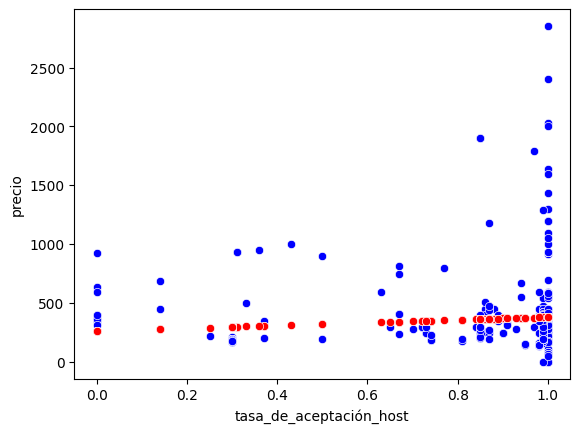

In [14]:
sns.scatterplot(x='tasa_de_aceptación_host', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='tasa_de_aceptación_host', y='Predicciones', color='red', data=df_shared_room)

__PRECIO VS TIPO DE HABITACIÓN__

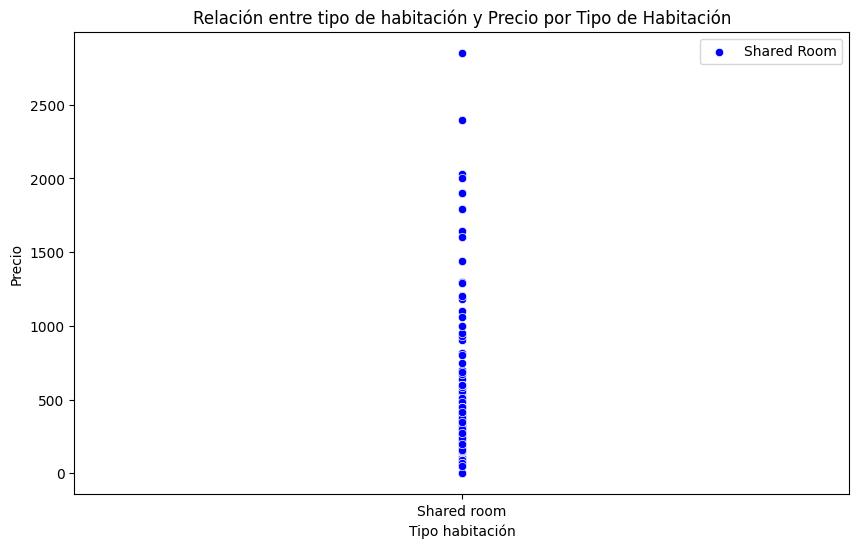

In [15]:
df_type_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['tipo_habitación', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tipo_habitación', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre tipo de habitación y Precio por Tipo de Habitación")
plt.xlabel("Tipo habitación")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [16]:
df_shared_room['tipo_habitación'] = df_shared_room['tipo_habitación'].map({'Shared room': 2})

In [17]:
df_shared_room['tipo_habitación'] = df_shared_room['tipo_habitación'].fillna(df_shared_room['tipo_habitación'].mean())


<Axes: xlabel='tipo_habitación', ylabel='precio'>

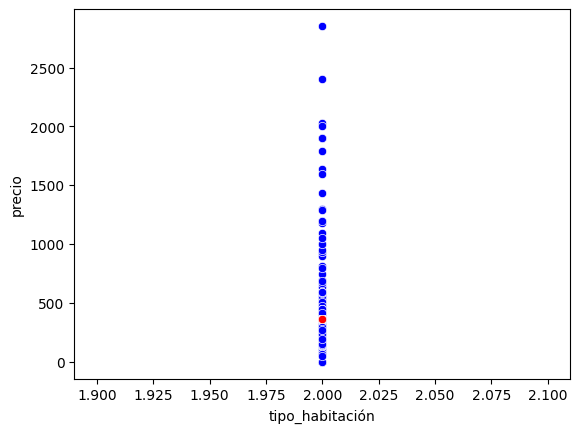

In [18]:
vars_Indep= df_shared_room[['tipo_habitación']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_shared_room[['tipo_habitación']])
y_pred

df_shared_room.insert(0, 'P2', y_pred)
df_shared_room

sns.scatterplot(x='tipo_habitación', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='tipo_habitación', y='P2', color='red', data=df_shared_room)

__PRICE vs HOST IS SUPERHOST__

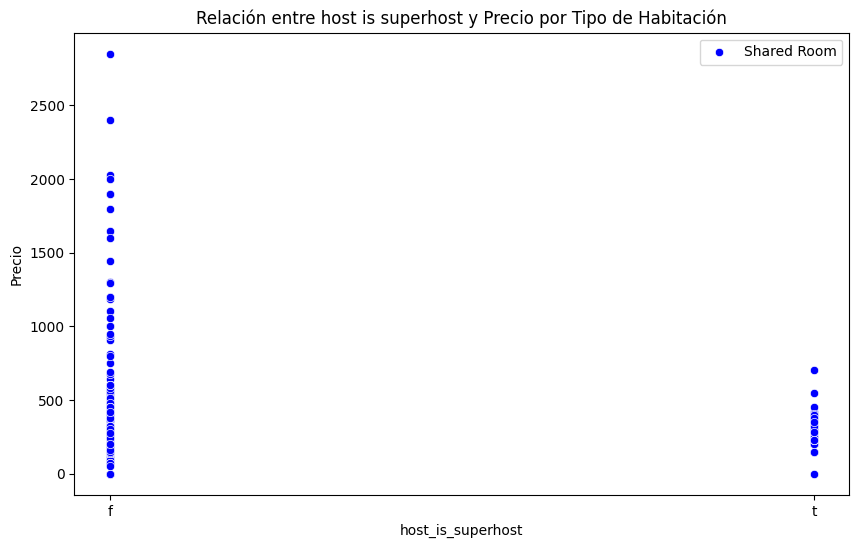

In [19]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['host_is_superhost', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='host_is_superhost', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre host is superhost y Precio por Tipo de Habitación")
plt.xlabel("host_is_superhost")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [20]:
df_shared_room['host_is_superhost'] = df_shared_room['host_is_superhost'].map({'f': 0, 't': 1})

In [21]:
vars_Indep= df_shared_room[['host_is_superhost']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
model.fit(X=vars_Indep, y=Vars_Dep)

LinearRegression()

In [23]:
model.__dict__

y_pred= model.predict(X=df_shared_room[['host_is_superhost']])
y_pred

array([369.6592068 , 369.6592068 , 316.39583333, 369.6592068 ,
       316.39583333, 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.6592068 ,
       369.6592068 , 369.6592068 , 369.6592068 , 369.65

In [24]:
df_shared_room.insert(0, 'Prediccion', y_pred)
df_shared_room

,Prediccion,Unnamed: 0,identificación,fuente,nombre,descripciÃ³n,descripciÃ³n general del vecindario,id_host,nombre_host,tiempo_respuesta_host,...,noches_mÃ­nimo_avg_ntm,mÃ¡ximas_noches_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicaciÃ³n,review_scores_location,review_scores_value,reseñas_por_mes
115,369.659207,115,6.171370e+05,previous scrape,Apt near Mexico City's downtown,Not available.,Not available,3059169,Andoni,Unknown,...,1.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
258,369.659207,258,3.197924e+06,city scrape,cuarto con terraza y uso general,"double bed , full bathroom, room with own terr...",Condesa is the main attraction in the city for...,16186468,Jordi,a few days or more,...,2.00,365.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
366,316.395833,366,5.434219e+06,city scrape,ãƒ¡ã‚­ã‚·ã‚³ã‚·ãƒ†ã‚£ã®é©å‘½è¨˜å¿µå¡”ä»˜è¿‘ã...,Single Room $30<br />Double room $60<br />Dorm...,Not available,28190065,Tetsuo,within a few hours,...,2.00,1125.0,4.44,4.74,4.47,4.74,4.71,4.71,4.59,0.30
444,369.659207,444,6.972071e+06,city scrape,SUPER SAVER GROUP DEAL - PERFECT FOR STUDENTS,Welcome to the best college-style dorms in a B...,Not available,35406862,Thor,within a few hours,...,1.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
456,316.395833,456,6.076798e+06,city scrape,Nova House,It has all the comforts to rest if you come fo...,The neighborhood is popular where you can expe...,31426842,Antonio,within a few hours,...,1.00,1125.0,4.85,4.84,4.93,4.94,4.91,4.69,4.93,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26261,369.659207,26261,1.240000e+18,city scrape,Cuarto Familiar para 6 personas,This bedroom is ideal for a full family or a g...,Not available,63557308,Oscar Arturo,within an hour,...,1.00,365.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
26336,369.659207,26336,1.250000e+18,city scrape,IOW4 LV studio,IOW4 LV STUDIOÂ© CONCEPT TO SHARE TRIPS IN STA...,Not available,244230249,Joe'S,within an hour,...,3.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
26371,369.659207,26371,1.250000e+18,city scrape,IOW4 LV maravillosa,IOW4 LV WONDERFULÂ© CONCEPT TO SHARE TRIPS IN ...,Not available,244230249,Joe'S,within an hour,...,3.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
26447,369.659207,26447,1.250000e+18,city scrape,La casa de marmol,Disconnect from your concerns in this spacious...,Not available,652641401,Veronica,Unknown,...,1.00,365.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


<Axes: xlabel='host_is_superhost', ylabel='precio'>

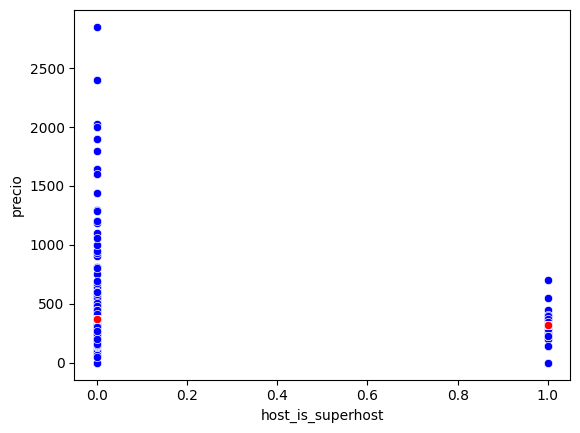

In [25]:
sns.scatterplot(x='host_is_superhost', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='host_is_superhost', y='Prediccion', color='red', data=df_shared_room)

__accommodates vs bathrooms__

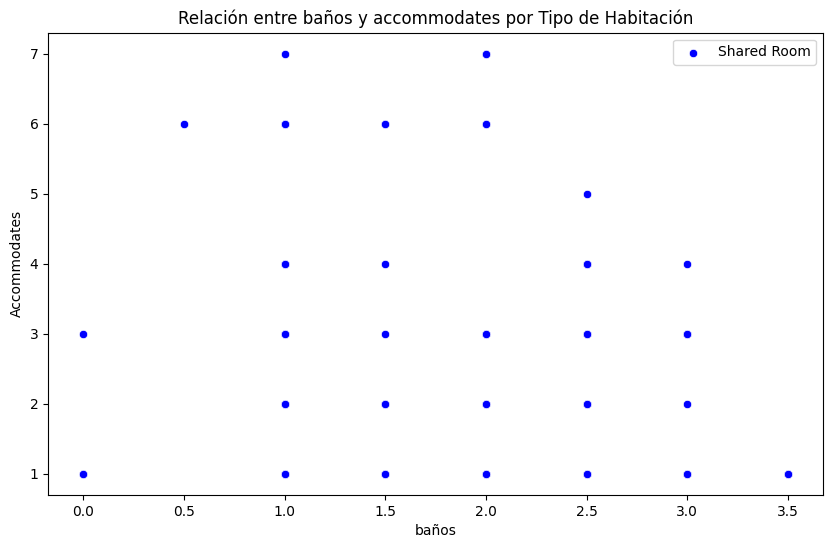

In [26]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['baños', 'se_adapta'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='baños', y='se_adapta', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre baños y accommodates por Tipo de Habitación")
plt.xlabel("baños")
plt.ylabel("Accommodates")
plt.legend()
plt.show()

In [27]:
vars_Indep= df_shared_room[['baños']]
Vars_Dep= df_shared_room['se_adapta']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [28]:
model.fit(X=vars_Indep, y=Vars_Dep)

LinearRegression()

In [30]:
model.__dict__

y_pred= model.predict(X=df_shared_room[['baños']])
y_pred

array([1.54800823, 1.62306704, 1.54800823, 1.54800823, 1.84824346,
       1.54800823, 1.54800823, 1.54800823, 1.54800823, 1.54800823,
       1.54800823, 1.54800823, 1.54800823, 1.54800823, 1.54800823,
       1.54800823, 1.54800823, 1.54800823, 1.54800823, 1.54800823,
       1.54800823, 1.54800823, 1.54800823, 1.62306704, 1.54800823,
       1.54800823, 1.54800823, 1.54800823, 1.54800823, 1.62306704,
       1.62306704, 1.54800823, 1.62306704, 1.62306704, 1.54800823,
       1.54800823, 1.62306704, 1.62306704, 1.62306704, 1.62306704,
       1.54800823, 1.62306704, 1.54800823, 1.62306704, 1.54800823,
       1.54800823, 1.54800823, 1.54800823, 1.54800823, 1.54800823,
       1.54800823, 1.54800823, 1.54800823, 1.54800823, 1.54800823,
       1.69812584, 1.54800823, 1.54800823, 1.54800823, 1.54800823,
       1.54800823, 1.54800823, 1.54800823, 1.39789062, 1.77318465,
       1.54800823, 1.77318465, 1.84824346, 1.54800823, 1.54800823,
       1.54800823, 1.54800823, 1.54800823, 1.54800823, 1.54800

In [31]:
df_shared_room.insert(0, 'Predicci', y_pred)
df_shared_room

,Predicci,Unnamed: 0,identificación,fuente,nombre,descripciÃ³n,descripciÃ³n general del vecindario,id_host,nombre_host,tiempo_respuesta_host,...,noches_mÃ­nimo_avg_ntm,mÃ¡ximas_noches_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicaciÃ³n,review_scores_location,review_scores_value,reseñas_por_mes
115,1.548008,115,6.171370e+05,previous scrape,Apt near Mexico City's downtown,Not available.,Not available,3059169,Andoni,Unknown,...,1.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
258,1.623067,258,3.197924e+06,city scrape,cuarto con terraza y uso general,"double bed , full bathroom, room with own terr...",Condesa is the main attraction in the city for...,16186468,Jordi,a few days or more,...,2.00,365.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
366,1.548008,366,5.434219e+06,city scrape,ãƒ¡ã‚­ã‚·ã‚³ã‚·ãƒ†ã‚£ã®é©å‘½è¨˜å¿µå¡”ä»˜è¿‘ã...,Single Room $30<br />Double room $60<br />Dorm...,Not available,28190065,Tetsuo,within a few hours,...,2.00,1125.0,4.44,4.74,4.47,4.74,4.71,4.71,4.59,0.30
444,1.548008,444,6.972071e+06,city scrape,SUPER SAVER GROUP DEAL - PERFECT FOR STUDENTS,Welcome to the best college-style dorms in a B...,Not available,35406862,Thor,within a few hours,...,1.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
456,1.848243,456,6.076798e+06,city scrape,Nova House,It has all the comforts to rest if you come fo...,The neighborhood is popular where you can expe...,31426842,Antonio,within a few hours,...,1.00,1125.0,4.85,4.84,4.93,4.94,4.91,4.69,4.93,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26261,1.548008,26261,1.240000e+18,city scrape,Cuarto Familiar para 6 personas,This bedroom is ideal for a full family or a g...,Not available,63557308,Oscar Arturo,within an hour,...,1.00,365.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
26336,1.548008,26336,1.250000e+18,city scrape,IOW4 LV studio,IOW4 LV STUDIOÂ© CONCEPT TO SHARE TRIPS IN STA...,Not available,244230249,Joe'S,within an hour,...,3.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
26371,1.548008,26371,1.250000e+18,city scrape,IOW4 LV maravillosa,IOW4 LV WONDERFULÂ© CONCEPT TO SHARE TRIPS IN ...,Not available,244230249,Joe'S,within an hour,...,3.00,1125.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
26447,1.773185,26447,1.250000e+18,city scrape,La casa de marmol,Disconnect from your concerns in this spacious...,Not available,652641401,Veronica,Unknown,...,1.00,365.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


<Axes: xlabel='baños', ylabel='se_adapta'>

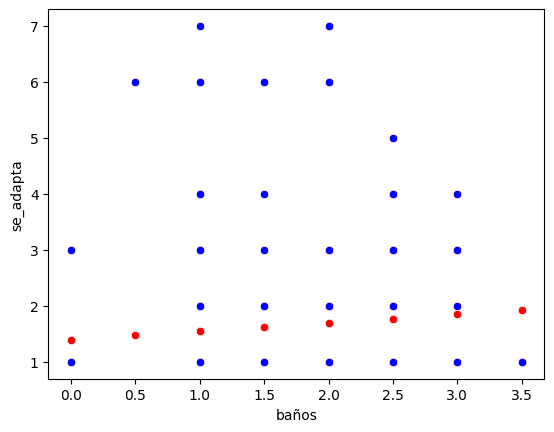

In [32]:
sns.scatterplot(x='baños', y='se_adapta', color='blue', data=df_shared_room)
sns.scatterplot(x='baños', y='Predicci', color='red', data=df_shared_room)

__price vs review_scores_cleanliness__

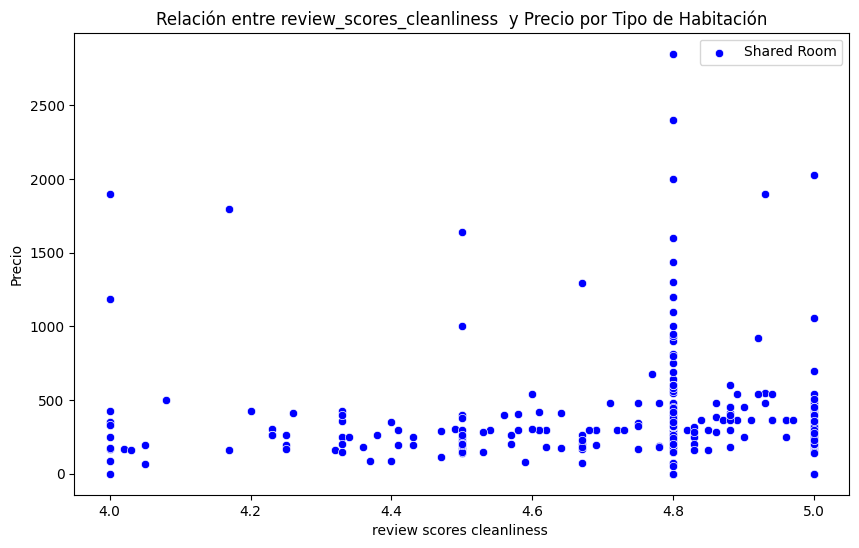

In [33]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['review_scores_cleanliness', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_cleanliness', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre review_scores_cleanliness  y Precio por Tipo de Habitación")
plt.xlabel("review scores cleanliness ")
plt.ylabel("Precio")
plt.legend()
plt.show()

<Axes: xlabel='review_scores_cleanliness', ylabel='precio'>

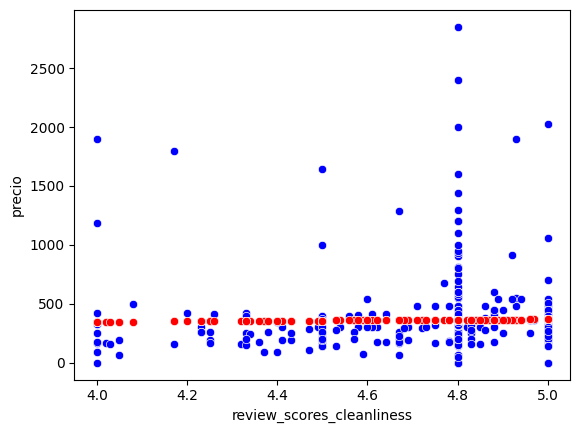

In [34]:
vars_Indep= df_shared_room[['review_scores_cleanliness']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_shared_room[['review_scores_cleanliness']])
y_pred

df_shared_room.insert(0, 'Predicc', y_pred)
df_shared_room

sns.scatterplot(x='review_scores_cleanliness', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='review_scores_cleanliness', y='Predicc', color='red', data=df_shared_room)

__price vs número_de_reseñas__

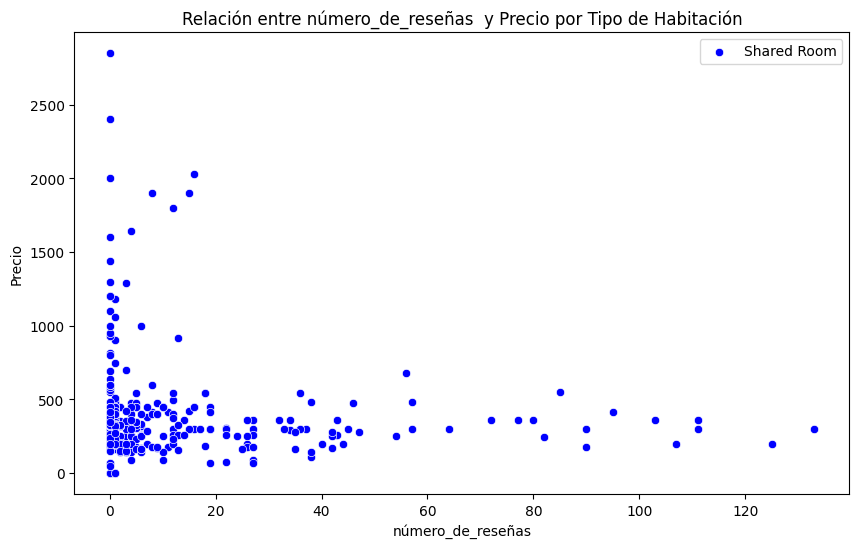

In [35]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['número_de_reseñas', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='número_de_reseñas', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre número_de_reseñas  y Precio por Tipo de Habitación")
plt.xlabel("número_de_reseñas")
plt.ylabel("Precio")
plt.legend()
plt.show()

<Axes: xlabel='número_de_reseñas', ylabel='precio'>

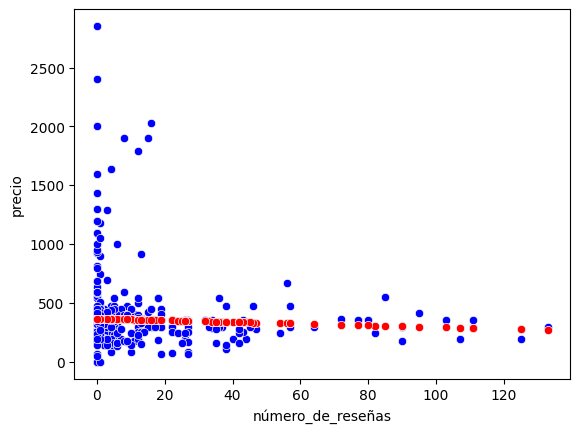

In [36]:
vars_Indep= df_shared_room[['número_de_reseñas']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_shared_room[['número_de_reseñas']])
y_pred

df_shared_room.insert(0, 'Predic', y_pred)
df_shared_room

sns.scatterplot(x='número_de_reseñas', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='número_de_reseñas', y='Predic', color='red', data=df_shared_room)

__price vs instant_bookable__

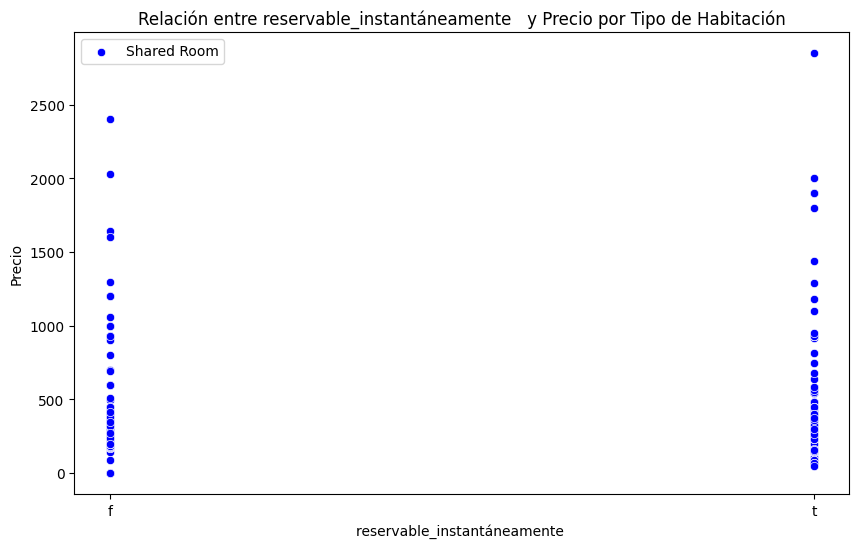

In [37]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['reservable_instantáneamente', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reservable_instantáneamente', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre reservable_instantáneamente   y Precio por Tipo de Habitación")
plt.xlabel("reservable_instantáneamente ")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [38]:
df_shared_room['reservable_instantáneamente'] = df_shared_room['reservable_instantáneamente'].map({'f': 0, 't': 1})

<Axes: xlabel='reservable_instantáneamente', ylabel='precio'>

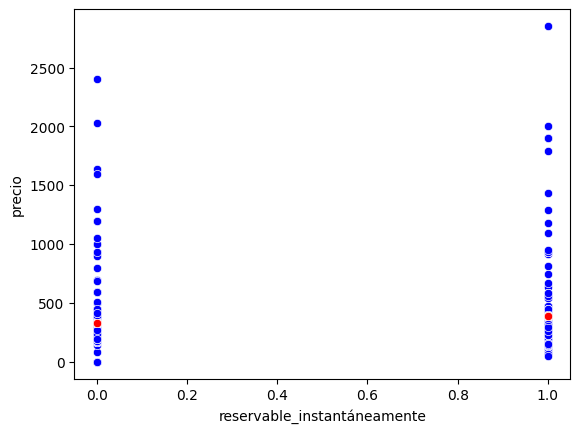

In [39]:
vars_Indep= df_shared_room[['reservable_instantáneamente']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_shared_room[['reservable_instantáneamente']])
y_pred

df_shared_room.insert(0, 'Predi', y_pred)
df_shared_room

sns.scatterplot(x='reservable_instantáneamente', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='reservable_instantáneamente', y='Predi', color='red', data=df_shared_room)

__Price vs property_type__

In [40]:
frecuencias = dfv['tipo_propiedad'].value_counts()
dfv['tipo_propiedad'] = dfv['tipo_propiedad'].map(frecuencias)
print(dfv[['tipo_propiedad']])

       tipo_propiedad
0                  13
1                 817
2                9971
3                9971
4                1515
...               ...
26577             381
26578             504
26579             504
26580             504
26581            9971

[26582 rows x 1 columns]


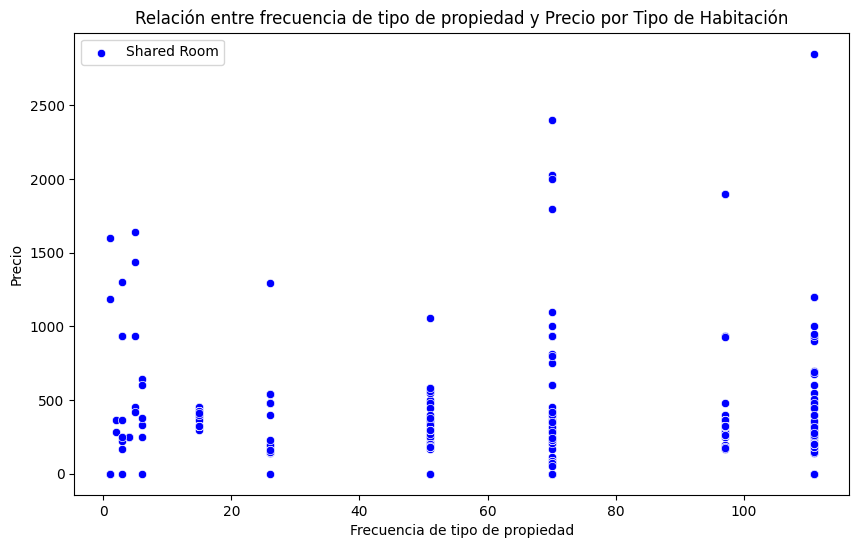

In [41]:
f_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['tipo_propiedad', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tipo_propiedad', y='precio', data=f_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre frecuencia de tipo de propiedad y Precio por Tipo de Habitación")
plt.xlabel("Frecuencia de tipo de propiedad")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [42]:
tipos_de_propiedad = f_shared_room['tipo_propiedad'].unique()
print(tipos_de_propiedad)


[ 70   6  51  97 111   3   1   5  15   2  26   4]


<Axes: xlabel='tipo_propiedad', ylabel='precio'>

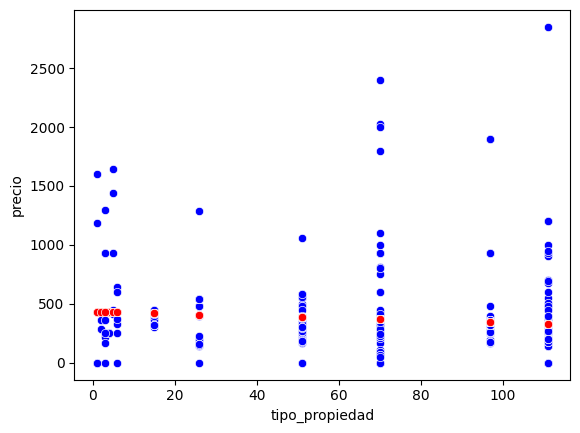

In [43]:
vars_Indep= f_shared_room[['tipo_propiedad']]
Vars_Dep= f_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=f_shared_room[['tipo_propiedad']])
y_pred

f_shared_room.insert(0, 'Pre', y_pred)
f_shared_room

sns.scatterplot(x='tipo_propiedad', y='precio', color='blue', data=f_shared_room)
sns.scatterplot(x='tipo_propiedad', y='Pre', color='red', data=f_shared_room)

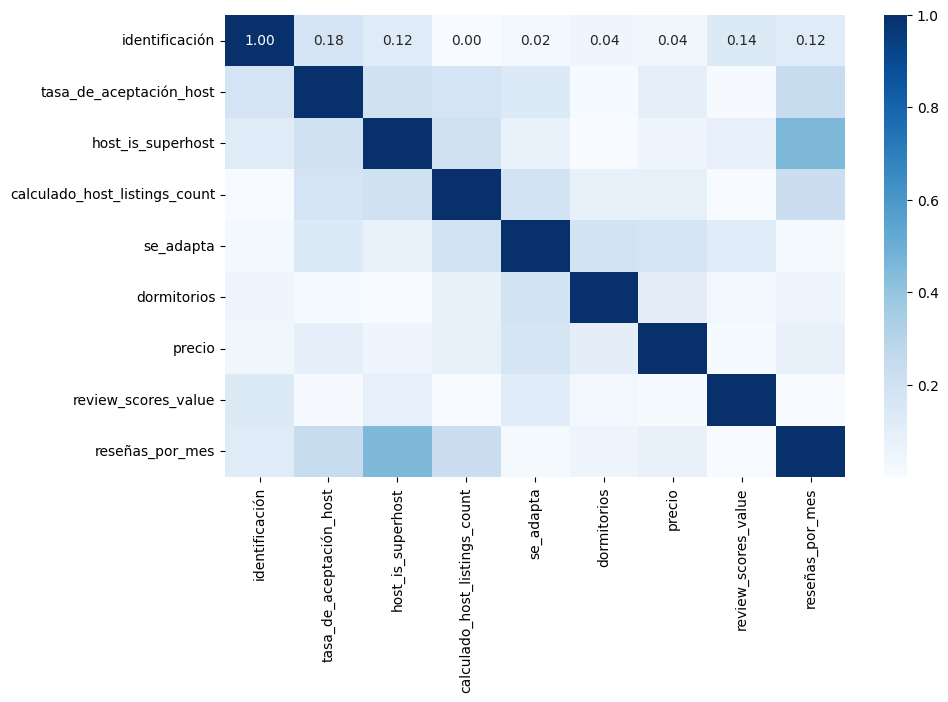

In [44]:
filtro = df_shared_room.loc[:, ["identificación", "tasa_de_aceptación_host", "host_is_superhost", "calculado_host_listings_count", "se_adapta", "dormitorios", "precio", "review_scores_value", "reseñas_por_mes"]]

filtro["host_is_superhost"] = filtro["host_is_superhost"].map({'t': 1, 'f': 0})  
filtro["se_adapta"] = filtro["se_adapta"].astype("category").cat.codes  

filtro = filtro.apply(pd.to_numeric, errors='coerce')

Corr_Factors = filtro.corr()

Corr_Factors1 = abs(Corr_Factors)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
plt.show()